(5000, 2)
(5000,)


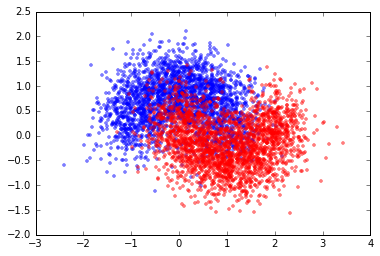

In [11]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=5000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);

In [2]:
%rm -rf _models
scores, confusions, predictions = poly(data,label, n_folds=8, verbose=1, feature_selection=False, scoring='f1', concurrency=4)

  Multilayer Perceptron           Nearest Neighbors           Linear SVM  \
                  train      test             train      test      train   
0              0.940432  0.926599          0.947096  0.914141   0.912542   
1              0.939936  0.930682          0.946384   0.91605   0.910484   
2              0.939217  0.933867          0.945048  0.931468   0.908965   
3              0.940842   0.92024          0.947042  0.915805   0.911521   
4              0.935201  0.955447          0.942281  0.950469   0.906103   
5               0.93744  0.947228          0.943824  0.940294   0.908445   
6              0.935816  0.949499          0.944519  0.933874    0.90707   
7              0.939492  0.933319           0.94492  0.932548    0.91138   

            Decision Tree           Random Forest            \
       test         train      test         train      test   
0  0.888975             1  0.769968      0.999779   0.90029   
1  0.904235             1  0.795527      0.999624 

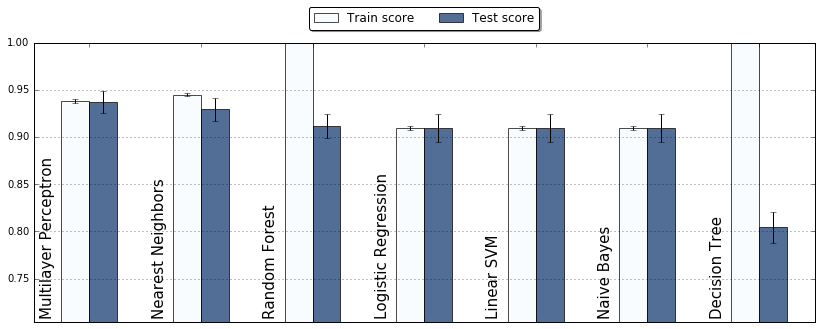

In [3]:
plot(scores)

In [4]:
for key, val in confusions.items():
    print(key)
    print(val)

Multilayer Perceptron
[[ 2187.   313.]
 [  345.  2155.]]
Nearest Neighbors
[[ 2189.   311.]
 [  385.  2115.]]
Naive Bayes
[[ 2086.   414.]
 [  431.  2069.]]
Linear SVM
[[ 2084.   416.]
 [  426.  2074.]]
Logistic Regression
[[ 2081.   419.]
 [  422.  2078.]]
Decision Tree
[[ 2016.   484.]
 [  495.  2005.]]
Random Forest
[[ 2125.   375.]
 [  410.  2090.]]


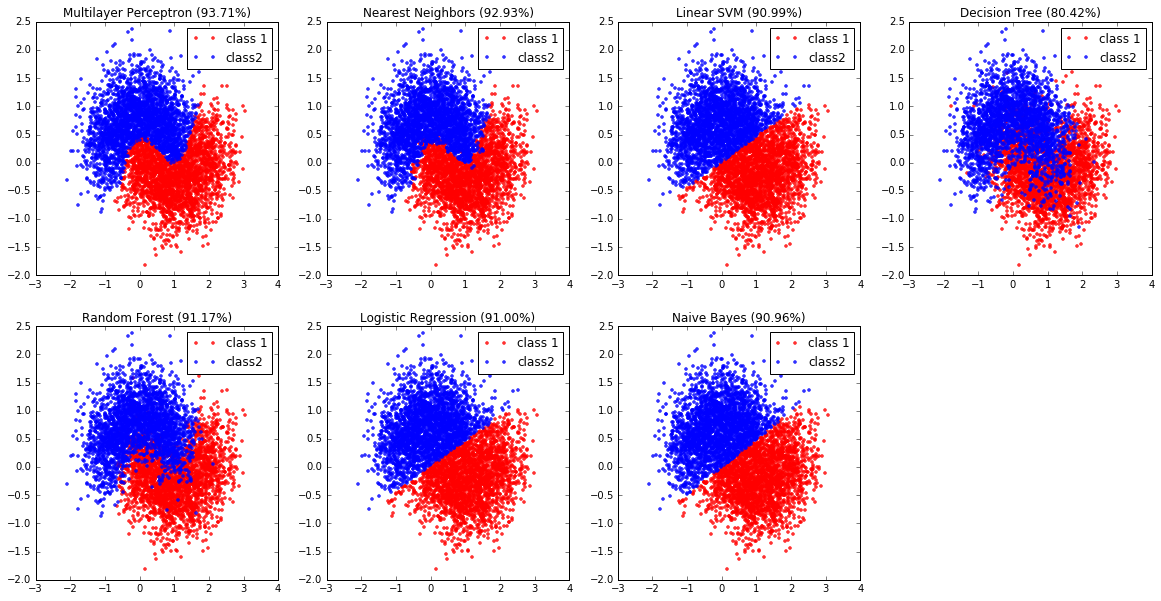

In [5]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))